### **XYZ Ads Airing Report Analysis**
* Trainity Final Project 3
* submitted by -> Sangam Mahajan

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/xyz-ads-airings/XYZ_Ads_Airings_Data.csv')
df.head()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01-10-2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2021,JAN,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01-05-2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01-06-2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01-02-2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,2021,JAN,1,6,23,Northeast India


In [3]:
dfpp = df.groupby("Pod Position").sum()
dfpp 

,Id,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Week,Day Of Week,Hour Of Day
Pod Position,,,,,,,,
1,219791426071,4400650,146700.94,324025029,322677418,3988739,645813,1952381
2,152990651803,3040565,101358.69,187654622,226872836,2713447,452718,1398589
3,138105734515,2718835,90638.03,196432582,204809213,2457927,409737,1279669
4,115124270536,2249070,74977.98,178545699,170633900,2051333,342087,1078711
5,92113750920,1786135,59545.62,132148569,136614177,1640883,272244,865813
6,74922982851,1446720,48230.29,105981319,111274763,1328945,221459,707755
7,58800935594,1131085,37707.73,77255099,87228801,1046037,172992,557359
8,45536311410,872285,29080.24,58205928,67435058,812534,133028,436211
9,33136810433,632965,21102.00,41909147,49159042,589604,95703,318295


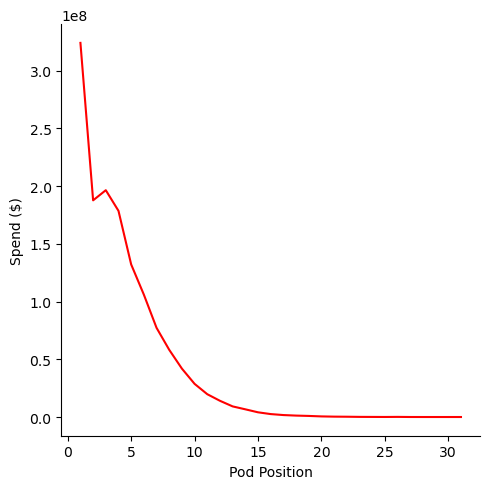

In [4]:
sns.relplot(data=dfpp,x="Pod Position", y="Spend ($)",kind="line", color="red")

Task A -> Yes, it does indirectly affect the amount spent on airings, as higher the money spent, we have lesser the pod position.

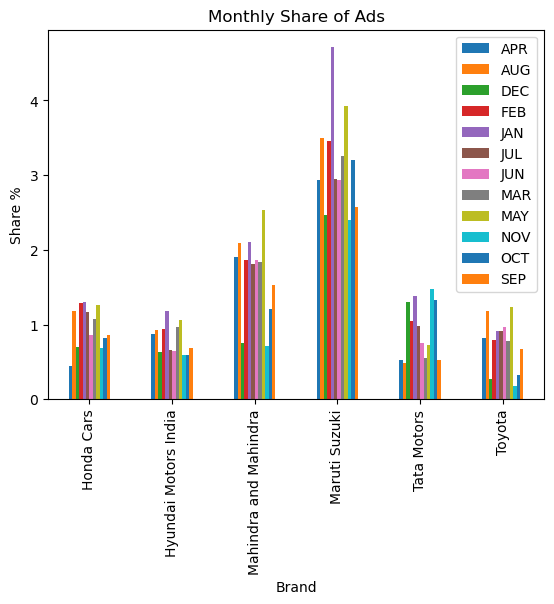

In [5]:
df_monthly=df.groupby(["Brand","Broadcast Month"]).Id.count()*100/(len(df["Id"]))
df_monthly.unstack().plot.bar()
plt.title("Monthly Share of Ads")
plt.ylabel("Share %")
plt.legend(loc="upper right")

In [6]:
#Creating the column Quarter
conditions=[(df['Broadcast Month']=="JAN") | (df['Broadcast Month']=="FEB") | (df['Broadcast Month']=="MAR"),
            (df['Broadcast Month']=="APR") | (df['Broadcast Month']=="MAY") | (df['Broadcast Month']=="JUN"),
            (df['Broadcast Month']=="JUL") | (df['Broadcast Month']=="AUG") | (df['Broadcast Month']=="SEP"),
            (df['Broadcast Month']=="OCT") | (df['Broadcast Month']=="NOV") | (df['Broadcast Month']=="DEC")
            ]
quarters=["Q1","Q2","Q3","Q4"]

df['Quarter']=np.select(conditions,quarters)

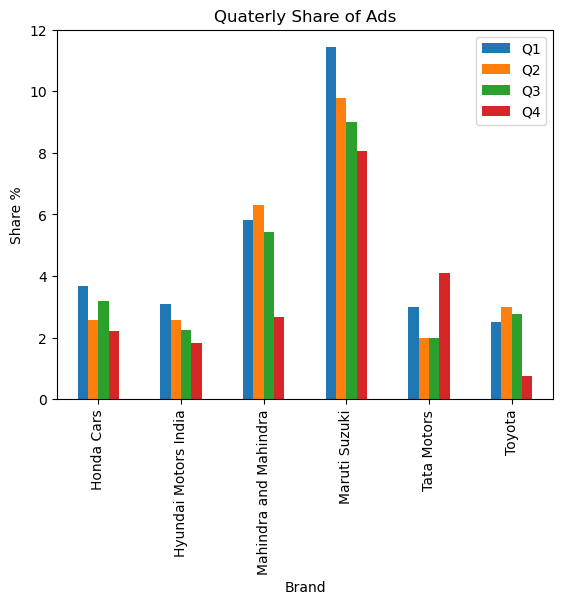

In [7]:
dfq=df.groupby(["Brand","Quarter"]).Id.count()*100/(len(df["Id"]))
dfq.unstack().plot.bar()
plt.title("Quaterly Share of Ads")
plt.ylabel("Share %")
plt.legend(loc="upper right")

#### Competitive Analysis

Text(0, 0.5, '')

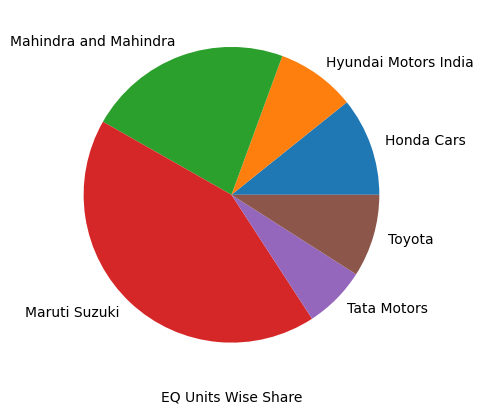

In [8]:
df.groupby("Brand").sum().plot(kind="pie",y="EQ Units")
plt.legend().remove()
plt.xlabel("EQ Units Wise Share");
plt.ylabel("")

Text(0, 0.5, '')

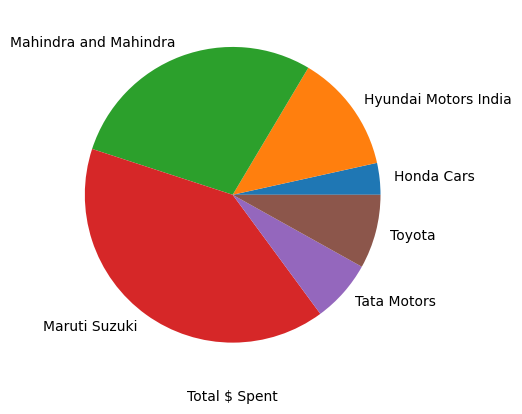

In [9]:
df.groupby("Brand").sum().plot(kind="pie",y="Spend ($)")
plt.legend().remove();
plt.xlabel("Total $ Spent")
plt.ylabel("")

<Figure size 2000x1000 with 0 Axes>

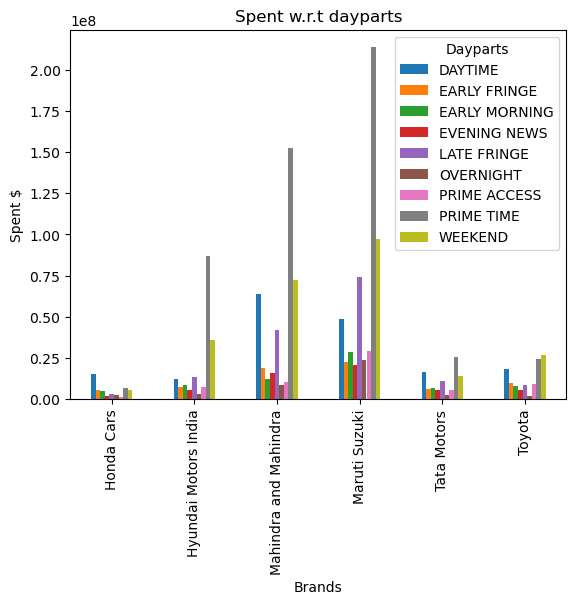

In [10]:
dfdays = df.groupby(["Brand","Dayparts"]).sum()['Spend ($)']
plt.figure(figsize=([20,10]))
dfdays.unstack().plot.bar()
plt.title("Spent w.r.t dayparts")
plt.xlabel("Brands")
plt.ylabel("Spent $")
plt.legend(title="Dayparts")
plt.show()

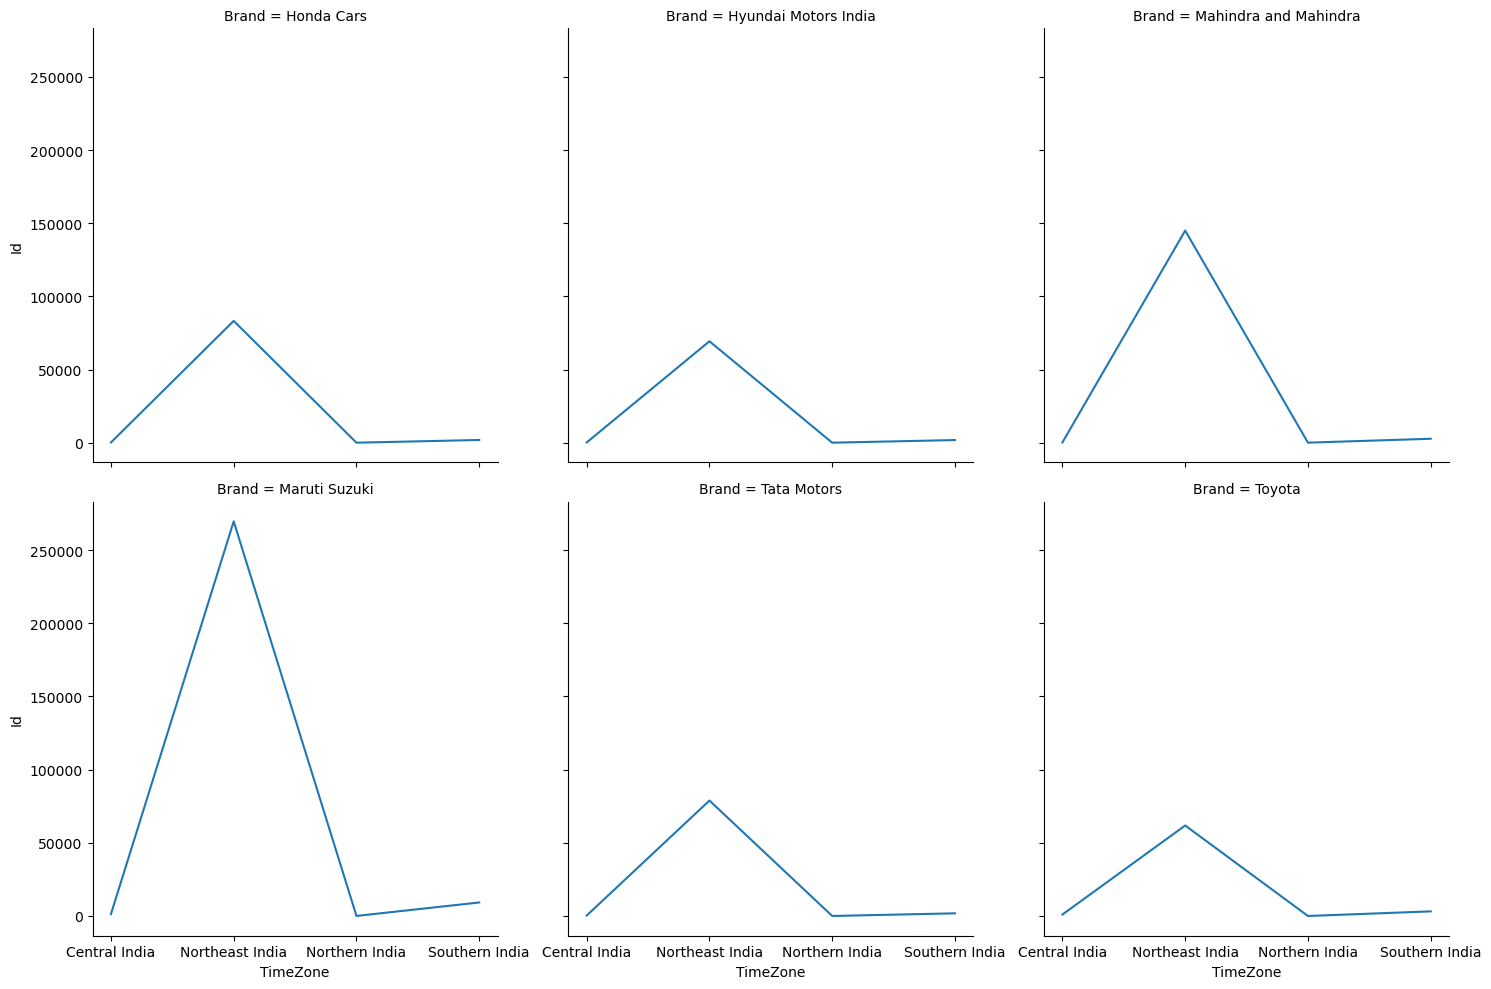

In [11]:
dftz=df.groupby(["Brand","TimeZone"]).count().reset_index()
dftz.loc[dftz["Brand"]=="Mahindra and Mahindra"]
sns.relplot(data=dftz,x="TimeZone",y="Id",col="Brand",kind="line",col_wrap=3)

<AxesSubplot:xlabel='TimeZone', ylabel='Id'>

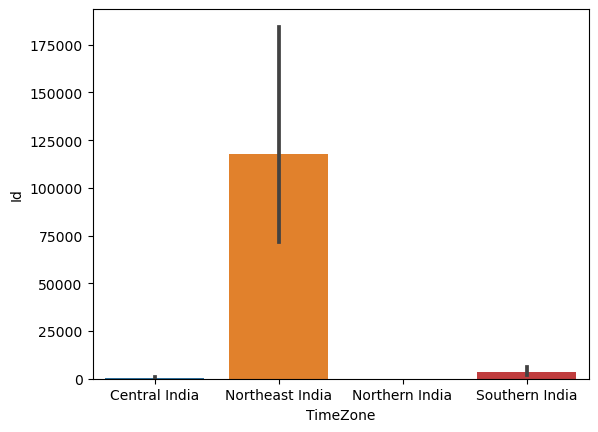

In [12]:
sns.barplot(data=dftz,x="TimeZone",y="Id")